In [1]:
include("../src/PhasorNetworks.jl")
using .PhasorNetworks

In [2]:
using Plots, DifferentialEquations

In [3]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [4]:
repeats = 6
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [5]:
phases = collect([[x, y] for x in range(-1.0, 1.0, n_x), y in range(-1.0, 1.0, n_y)]) |> stack
phases = reshape(phases, (1,2,:));

In [6]:
b = v_bind(phases, dims=2); 
ub = v_unbind(phases[1:1,1:1,:], phases[1:1,2:2,:]);

In [37]:
spk_args = SpikingArgs(t_window=0.01, solver = Tsit5(), threshold=0.001)

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [38]:
st_x = phase_to_train(phases[1:1,1:1,:], spk_args, repeats = repeats)
st_y = phase_to_train(phases[1:1,2:2,:], spk_args, repeats = repeats)

Spike Train: (1, 1, 10201) with 61206 spikes.

In [39]:
soln = v_bind(st_x, st_y, tspan = tspan, return_solution=true)

#50 (generic function with 1 method)

In [40]:
tbase = collect(0.0:0.01:6.0);

In [41]:
p_out = solution_to_phase(soln, tbase, offset=0.0, spk_args=spk_args)

1×1×10201×601 Array{Float64, 4}:
[:, :, 1, 1] =
 -1.0

[:, :, 2, 1] =
 -1.0

[:, :, 3, 1] =
 -1.0

;;; … 

[:, :, 10199, 1] =
 -1.0

[:, :, 10200, 1] =
 -1.0

[:, :, 10201, 1] =
 -1.0

[:, :, 1, 2] =
 0.0191853438432128

[:, :, 2, 2] =
 0.02000612529438084

[:, :, 3, 2] =
 0.020817223951574704

;;; … 

[:, :, 10199, 2] =
 -0.9800000000000001

[:, :, 10200, 2] =
 -0.9800000000000001

[:, :, 10201, 2] =
 -0.9800000000000001

[:, :, 1, 3] =
 0.03387544289081923

[:, :, 2, 3] =
 0.03695006092600761

[:, :, 3, 3] =
 0.04002369511067205

;;; … 

[:, :, 10199, 3] =
 -0.9600000000000001

[:, :, 10200, 3] =
 -0.9600000000000001

[:, :, 10201, 3] =
 -0.9600000000000001

;;;; … 

[:, :, 1, 599] =
 0.0024154013994444057

[:, :, 2, 599] =
 0.022139826559300024

[:, :, 3, 599] =
 0.04168001672743826

;;; … 

[:, :, 10199, 599] =
 -0.044623909867974376

[:, :, 10200, 599] =
 -0.02409313265609858

[:, :, 10201, 599] =
 -0.0026635118231368438

[:, :, 1, 600] =
 0.0024153520646095217

[:, :, 2, 600] =
 

In [42]:
p_out |> size

(1, 1, 10201, 601)

In [43]:
using Statistics: mean

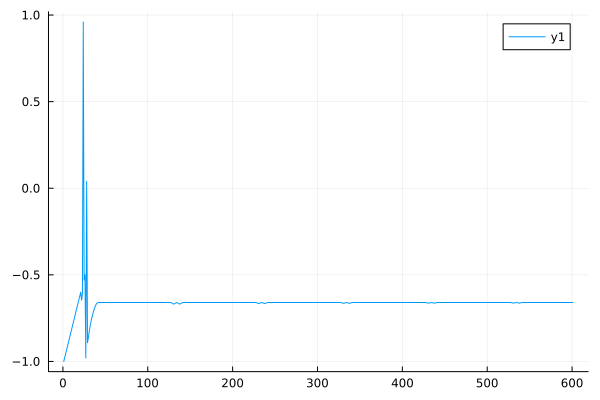

In [44]:
plot(p_out[1,1,3768, :])

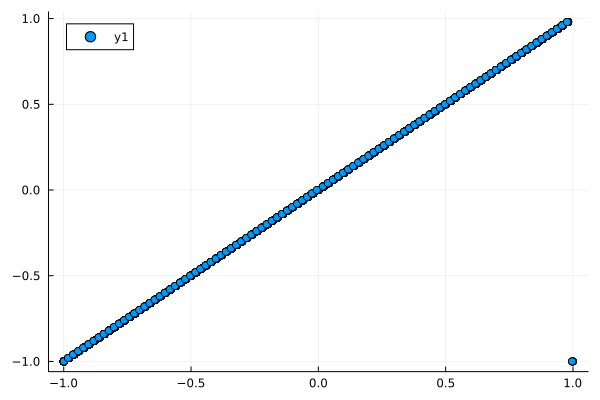

In [45]:
scatter(p_out[1,1,:,end], vec(b))

In [46]:
 phase_error = vec(p_out[1,1,:,end]) .- vec(b)
mean_error = phase_error |> mean

0.0016264713333166655

In [47]:
mean_error

0.0016264713333166655

In [48]:
using .PhasorNetworks: functional_solution_to_potential

In [49]:
u_out = functional_solution_to_potential(soln, tbase);

In [50]:
u_out |> size

(1, 1, 10201, 601)

In [51]:
function cplot(x, tbase)
    plot(tbase, real.(x))
    plot!(tbase, imag.(x))
end

cplot (generic function with 1 method)

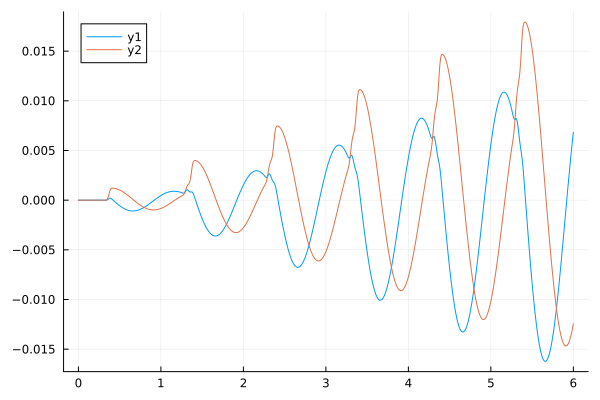

In [52]:
cplot(u_out[1,1,3768,:], tbase)

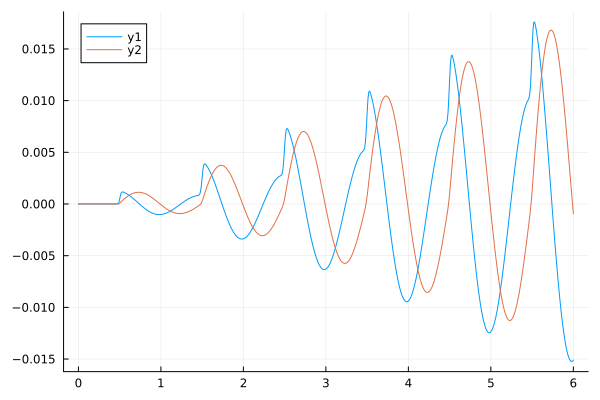

In [53]:
cplot(u_out[1,1,5000,:], tbase)

In [55]:
spk = v_bind(st_x, st_y, tspan = tspan, return_solution=false, spk_args = spk_args)

Spike Train: (1, 1, 10201) with 52279 spikes.

In [58]:
pp = train_to_phase(spk, spk_args);

In [59]:
pp |> size

(6, 1, 1, 10201)

In [61]:
pp_err = pp[end-1, :, :, :] .- b;

In [65]:
function remove_nan(x)
    y = filter(x -> !isnan(x), x)
    return y
end

remove_nan (generic function with 1 method)

In [66]:
mean(remove_nan(pp_err))

-0.013537223822608916

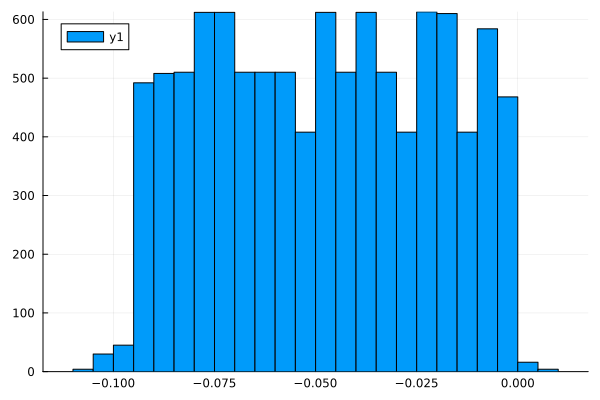

In [68]:
histogram(sin.(pi.*(remove_nan(pp_err))))